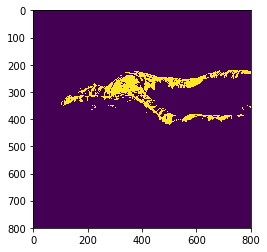

255


In [8]:
import cv2
import numpy as np
import dippykit as dip
import matplotlib.pyplot as plt
import pandas as pd


#PICKING AN IMAGE
im_original = cv2.imread("images/UW_400.png")
#im_original = cv2.imread("images/underwater-15.png")

#im_original = cv2.imread("images/24Zimmer-Refer-articleLarge.jpg")

#INITIAL EXPLORATION OF THE PICTURE

#Select pixels that are similar in color to skin
"""
#Select pixels that are similar in color to skin
im_skin = np.copy(im_original)
for i in range(np.shape(im_original)[0]):
    for j in range(np.shape(im_original)[1]):
        #if im_original[i,j][2] < 60:
        if im_original[i,j][2] < 60 or im_original[i,j][0] > 200: #Zones mostly reddish, not blueish
            im_skin[i,j]=[0,0,0]

cv2.imwrite("temp_images/tree_morf/skin_color.png", im_skin)

"""

im_skin = cv2.imread("temp_images/skin_color105.png")


#Select zones with high luminosity (probably zones iluminated by refracted light)
#im_gray = cv2.cvtColor(im_original, cv2.COLOR_BGR2GRAY)
im_gray = cv2.cvtColor(im_skin, cv2.COLOR_BGR2GRAY)
ret,th1 = cv2.threshold(im_gray,180,255,cv2.THRESH_BINARY)

cv2.imwrite("temp_images/binary.png", th1)

#Saliency detection
# initialize OpenCV's static fine grained saliency detector and compute the saliency map
saliency = cv2.saliency.StaticSaliencyFineGrained_create()
(success, saliencyMap) = saliency.computeSaliency(im_original)

# if we would like a *binary* map that we could process for contours,
# compute convex hull's, extract bounding boxes, etc., we can
# additionally threshold the saliency map

threshMap = cv2.threshold(saliencyMap*255, 80, 255,cv2.THRESH_BINARY)[1]

cv2.imwrite("temp_images/saliency.png", saliencyMap*255)


%matplotlib inline
dip.imshow(th1)
dip.show()


In [2]:
class Pixel(object):
    def __init__(self):
        self.position = None
        self.neighbors = None

In [14]:
#Interpolation 

im_skin_interp = np.copy(im_skin)

#Step 1: Go over all the pixels of "Zones similar to skin color" using a square of 4 pixels

for i in range(np.shape(im_skin)[0] - 1):
    for j in range(np.shape(im_skin)[1] -1):
        
        pixel_upper_left = im_skin[i,j]
        pixel_upper_rigth = im_skin[i,j+1]
        pixel_bottom_left = im_skin[i+1 ,j]
        pixel_bottom_rigth = im_skin[i+1,j+1]
        
        pixel_array = [pixel_upper_left, pixel_upper_rigth, pixel_bottom_left, pixel_bottom_rigth]
        
        remove_pixel = [False, False, False, False]
        
                
        #Step 2: Check if at least one of the 4 pixels correspond to the body (i.e. it isn´t black)
        
        if (pixel_upper_left > ([0, 0, 0])).all() or (pixel_upper_rigth > ([0,0,0])).all or (pixel_bottom_left > ([0,0,0])).all() or (pixel_bottom_rigth > ([0,0,0])).all():
            #Step 3: Check if any of those pixels are marked as pixels to remove (i.e. they are white on image after binary threshold)
            if th1[i,j] == 255: 
                remove_pixel[0] = True
            if th1[i,j+1] == 255: 
                remove_pixel[1] = True
            if th1[i+1,j] == 255: 
                remove_pixel[2] = True
            if th1[i+1,j+1] == 255: 
                remove_pixel[3] = True
 
            #We need to remove the targeted pixels and substitute its value with the average of the surrounding pixels that are part of the body
            
            aux_pixel_value = [0,0,0]
            num_pixels_for_average = 0
            
            for p in range(np.shape(pixel_array)[0]):
                #if remove_pixel[p] == False and (pixel_array[p] > ([0, 0, 0])).all(): 
                if remove_pixel[p] == False: #Using this condition, the image has less false skin-coloured pixels
                    aux_pixel_value = aux_pixel_value + pixel_array[p]
                    num_pixels_for_average = num_pixels_for_average + 1
                    
            if num_pixels_for_average > 0: 
                avg_pixel_value = aux_pixel_value/num_pixels_for_average
            elif num_pixels_for_average == 0:
                avg_pixel_value = (255,0,0)
               
            for p in range(np.shape(pixel_array)[0]):
                if remove_pixel[p] == True: 
                    pixel_array[p] =  avg_pixel_value
            """     
            if (im_skin[i,j] == [0,0,0]).all():
                im_skin_interp[i,j] = pixel_array[0]
            if (im_skin[i,j+1] == [0,0,0]).all():
                im_skin_interp[i,j+1] = pixel_array[1]
            if (im_skin[i+1,j] == [0,0,0]).all():
                im_skin_interp[i+1 ,j] = pixel_array[2]
            if (im_skin[i+1,j+1] == [0,0,0]).all():
                im_skin_interp[i+1,j+1] = pixel_array[3]
            """  
            im_skin_interp[i,j] = pixel_array[0]
            im_skin_interp[i,j+1] = pixel_array[1]
            im_skin_interp[i+1 ,j] = pixel_array[2]
            im_skin_interp[i+1,j+1] = pixel_array[3]
            
cv2.imwrite("temp_images/skin_color_interpolated.png", im_skin_interp)           
            


hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola


hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola


hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola


hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola


hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola


hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola


hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola


hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola


hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola


hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola


hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola


hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola


True

In [15]:
#list_pixel_first_order = list(range(0, np.shape(im_original)[0]*np.shape(im_original)[1]))
list_pixels_to_fix = []

#Adding red pixels to the list of pixels to fix
    
for i in range(np.shape(im_skin)[0] - 1):
    for j in range(np.shape(im_skin)[1] -1):
        if (im_skin_interp[i,j] == ([255,0,0])).all():
           
            list_pixels_to_fix.append((i,j))

print(list_pixels_to_fix)

[(219, 745), (219, 746), (219, 747), (219, 748), (219, 749), (219, 750), (219, 751), (219, 752), (219, 753), (220, 741), (220, 742), (220, 743), (220, 744), (220, 745), (220, 746), (220, 747), (220, 748), (220, 749), (220, 750), (220, 760), (220, 761), (220, 762), (220, 763), (220, 764), (220, 765), (220, 766), (220, 767), (220, 768), (221, 724), (221, 725), (221, 726), (221, 727), (221, 728), (221, 729), (221, 730), (221, 731), (221, 732), (221, 733), (221, 734), (221, 735), (221, 736), (221, 737), (221, 738), (221, 739), (221, 740), (221, 741), (221, 742), (221, 743), (221, 744), (221, 745), (221, 746), (221, 747), (221, 748), (221, 749), (221, 760), (221, 761), (221, 762), (221, 763), (221, 764), (221, 765), (221, 766), (221, 767), (221, 768), (221, 769), (221, 770), (221, 771), (221, 772), (221, 773), (221, 774), (221, 775), (221, 779), (221, 780), (221, 781), (221, 782), (222, 683), (222, 684), (222, 716), (222, 717), (222, 718), (222, 719), (222, 720), (222, 721), (222, 722), (22

In [16]:
"""

num_pixel = 0

list_pixels_first_order = []

for item in list_pixels_to_fix: 
        
        # i and j are the coordinates of each red pixel
        i = item[0]
        j = item[1]
        
        initialization_pixel = 0 #That means that the pixel has not been added yet to the list of first order pixels
        
        for row in range(i-1, i+2):
            for col in range(j-1, j+2): 
                #Here it checks if some of the surrounding pixels are not equal to red (i.e. has skin color)
                if (im_skin_interp[row,col] != ([255,0,0])).all():
                    
                    if initialization_pixel == 0: 
                        #the first time, it is created a structure inside the list and the position is registered 
                        #the list of neighbors is initialized
                        list_pixels_first_order.append(num_pixel)
                        list_pixels_first_order[num_pixel] = Pixel()
                        list_pixels_first_order[num_pixel].position = (i,j)
                        list_pixels_first_order[num_pixel].neighbors = []
                        
                        initialization_pixel = 1
                        num_pixel = num_pixel + 1
                    
                    list_pixels_first_order[num_pixel-1].neighbors.append((row,col))
        
        initialization_pixel = 0       
"""                    
"""
if (im_skin_interp[i-1,j-1] != ([255,0,0])).all(): 
    list_pixels_to_fix[num_pixel].neighbors.append((i-1,j-1))
if (im_skin_interp[i-1,j] != ([255,0,0])).all(): 
    list_pixels_to_fix[num_pixel].neighbors.append((i-1,j))
if (im_skin_interp[i-1,j+1] != ([255,0,0])).all(): 
    list_pixels_to_fix[num_pixel].neighbors.append((i-1,j+1))
if (im_skin_interp[i,j-1] != ([255,0,0])).all(): 
    list_pixels_to_fix[num_pixel].neighbors.append((i,j-1))
if (im_skin_interp[i,j+1] != ([255,0,0])).all(): 
    list_pixels_to_fix[num_pixel].neighbors.append((i-1,j+1))
if (im_skin_interp[i+1,j-1] != ([255,0,0])).all(): 
    list_pixels_to_fix[num_pixel].neighbors.append((i+1,j-1))
if (im_skin_interp[i+1,j+1] != ([255,0,0])).all(): 
    list_pixels_to_fix[num_pixel].neighbors.append((i+1,j+1))

"""
"""
for c in range(0,num_pixel):             
    print(list_pixels_first_order[c].position)   
    #print(list_pixels_to_fix[num_pixel].neighbors)  
    
"""
"""
print(list_pixels_first_order[0].position)
print(list_pixels_first_order[0].neighbors)

"""

'\nprint(list_pixels_first_order[0].position)\nprint(list_pixels_first_order[0].neighbors)\n\n'

In [17]:
"""

for item in list_pixels_first_order:
    # i and j are the coordinates of each first order pixel
    i = item.position[0]
    j = item.position[1]
    
    im_skin_interp[i,j] = [0, 255, 0]
    
%matplotlib inline
dip.imshow(im_skin_interp)
dip.show()

cv2.imwrite("temp_images/skin_color_interpolated_first_order.png", im_skin_interp)
"""
    

'\n\nfor item in list_pixels_first_order:\n    # i and j are the coordinates of each first order pixel\n    i = item.position[0]\n    j = item.position[1]\n    \n    im_skin_interp[i,j] = [0, 255, 0]\n    \n%matplotlib inline\ndip.imshow(im_skin_interp)\ndip.show()\n\ncv2.imwrite("temp_images/skin_color_interpolated_first_order.png", im_skin_interp)\n'

In [18]:
"""
for item in list_pixels_first_order:
    # i and j are the coordinates of each first order pixel
    i = item.position[0]
    j = item.position[1]
    #print(sum(np.array(item.neighbors)))
    
    aux_rgb = (0,0,0)
    
    for neighbor in item.neighbors: 
        row = neighbor[0]
        col = neighbor[1]
        
        aux_rgb = aux_rgb + im_skin_interp[row,col]
    
    im_skin_interp[i,j] = aux_rgb/len(item.neighbors)
    print(aux_rgb)
    print(len(item.neighbors))
    print(im_skin_interp[i,j])
    
%matplotlib inline
dip.imshow(im_skin_interp)
dip.show()

cv2.imwrite("temp_images/skin_color_interpolated_first_order_first_stage.png", im_skin_interp)
"""

'\nfor item in list_pixels_first_order:\n    # i and j are the coordinates of each first order pixel\n    i = item.position[0]\n    j = item.position[1]\n    #print(sum(np.array(item.neighbors)))\n    \n    aux_rgb = (0,0,0)\n    \n    for neighbor in item.neighbors: \n        row = neighbor[0]\n        col = neighbor[1]\n        \n        aux_rgb = aux_rgb + im_skin_interp[row,col]\n    \n    im_skin_interp[i,j] = aux_rgb/len(item.neighbors)\n    print(aux_rgb)\n    print(len(item.neighbors))\n    print(im_skin_interp[i,j])\n    \n%matplotlib inline\ndip.imshow(im_skin_interp)\ndip.show()\n\ncv2.imwrite("temp_images/skin_color_interpolated_first_order_first_stage.png", im_skin_interp)\n'

In [19]:
"""
#Iterative method

num_total_pix_to_fix = len(list_pixels_to_fix)
num_current_pixels_to_fix = len(list_pixels_to_fix)
while True: 
    
    
    #Step 1: Find which pixels are first order pixels from those we still need to fix
    num_pixel = 0

    list_pixels_first_order = []
    print(num_current_pixels_to_fix/num_total_pix_to_fix)
    
    for item in list_pixels_to_fix: 
        
        # i and j are the coordinates of each red pixel
        i = item[0]
        j = item[1]
        
        initialization_pixel = 0 #That means that the pixel has not been added yet to the list of first order pixels
        
        for row in range(i-1, i+2):
            for col in range(j-1, j+2): 
                #Here it checks if some of the surrounding pixels are not equal to red (i.e. has skin color)
                if (im_skin_interp[row,col] != ([255,0,0])).all():
                    
                    if initialization_pixel == 0: 
                        #the first time, it is created a structure inside the list and the position is registered 
                        #the list of neighbors is initialized
                        list_pixels_first_order.append(num_pixel)
                        list_pixels_first_order[num_pixel] = Pixel()
                        list_pixels_first_order[num_pixel].position = (i,j)
                        list_pixels_first_order[num_pixel].neighbors = []
                        
                        initialization_pixel = 1
                        num_pixel = num_pixel + 1
                    
                    list_pixels_first_order[num_pixel-1].neighbors.append((row,col))
        
        initialization_pixel = 0   
        
        
    #Step 2: Interpolate those first order pixels
    
    for item in list_pixels_first_order:
        # i and j are the coordinates of each first order pixel
        i = item.position[0]
        j = item.position[1]
        #print(sum(np.array(item.neighbors)))

        aux_rgb = (0,0,0)

        for neighbor in item.neighbors: 
            row = neighbor[0]
            col = neighbor[1]

            aux_rgb = aux_rgb + im_skin_interp[row,col]

        im_skin_interp[i,j] = aux_rgb/len(item.neighbors)
        #print(aux_rgb)
        #print(len(item.neighbors))
        #print(im_skin_interp[i,j])
        
        list_pixels_to_fix.remove((i,j))

    num_current_pixels_to_fix = len(list_pixels_to_fix)
    
    #print(num_current_pixels_to_fix/num_total_pix_to_fix)
    
    %matplotlib inline
    dip.imshow(im_skin_interp)
    dip.show()
    cv2.imwrite("temp_images/skin_color_interpolated_first_order_last_stage.png", im_skin_interp)
    if len(list_pixels_to_fix) == []:
        break
        
    
%matplotlib inline
dip.imshow(im_skin_interp)
dip.show()
    
    
cv2.imwrite("temp_images/skin_color_interpolated_first_order_last_stage.png", im_skin_interp)

"""

'\n#Iterative method\n\nnum_total_pix_to_fix = len(list_pixels_to_fix)\nnum_current_pixels_to_fix = len(list_pixels_to_fix)\nwhile True: \n    \n    \n    #Step 1: Find which pixels are first order pixels from those we still need to fix\n    num_pixel = 0\n\n    list_pixels_first_order = []\n    print(num_current_pixels_to_fix/num_total_pix_to_fix)\n    \n    for item in list_pixels_to_fix: \n        \n        # i and j are the coordinates of each red pixel\n        i = item[0]\n        j = item[1]\n        \n        initialization_pixel = 0 #That means that the pixel has not been added yet to the list of first order pixels\n        \n        for row in range(i-1, i+2):\n            for col in range(j-1, j+2): \n                #Here it checks if some of the surrounding pixels are not equal to red (i.e. has skin color)\n                if (im_skin_interp[row,col] != ([255,0,0])).all():\n                    \n                    if initialization_pixel == 0: \n                        #t

Ratio: 0


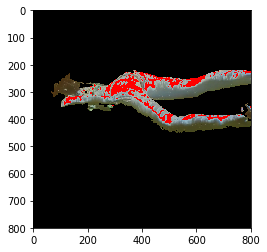

Ratio: 0.6784452296819788


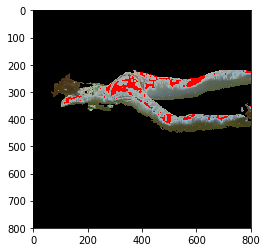

Ratio: 0.44965782528961845


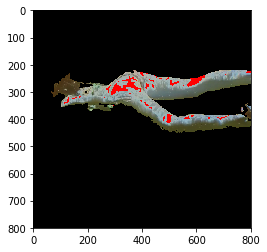

Ratio: 0.29306257547971554


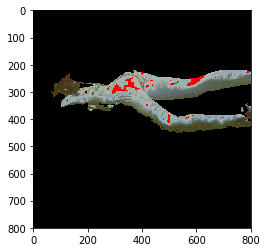

Ratio: 0.19099163572930178


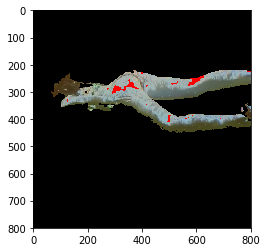

Ratio: 0.1289976293778235


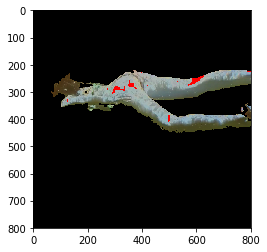

Ratio: 0.0887417810976428


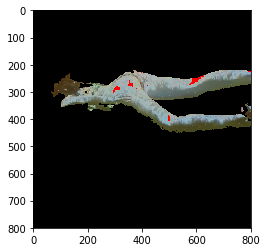

Ratio: 0.060786330903072866


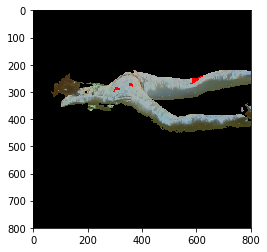

Ratio: 0.04052422060204858


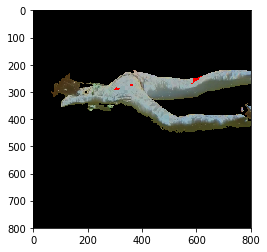

Ratio: 0.027284519389900255


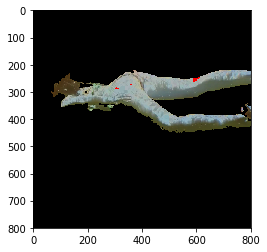

Ratio: 0.017802030683902133


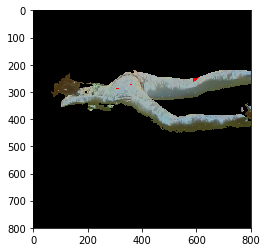

Ratio: 0.011495281120007157


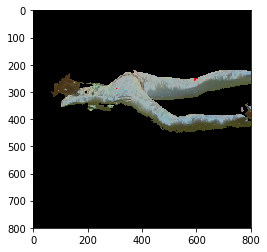

Ratio: 0.006843494207630719


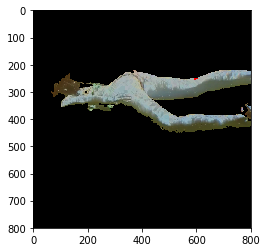

Ratio: 0.004651786912376437


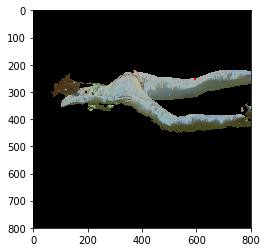

Ratio: 0.0031310104217918324


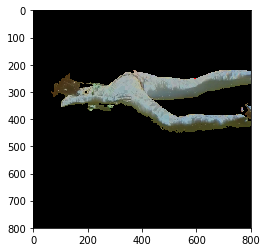

Ratio: 0.0019680636936977233


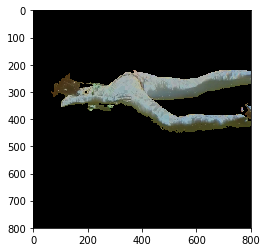

Ratio: 0.0009840318468488617


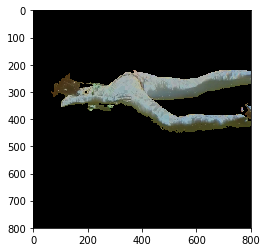

Ratio: 0.00013418616093393567


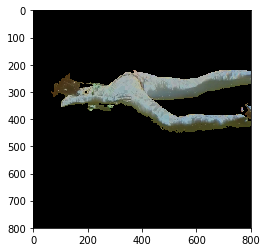

Ratio: 0.0


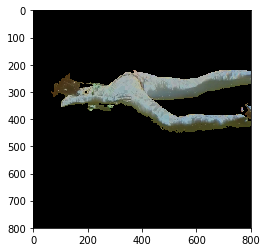

Completed


True

In [20]:
#Iterative method: after selecting the pixels to fix, this block iteratively find the first order pixels 
#in each iteration and paints them averaging the color of the neighbors 


num_total_pix_to_fix = len(list_pixels_to_fix)
num_current_pixels_to_fix = len(list_pixels_to_fix)

#ratio_old = num_current_pixels_to_fix/num_total_pix_to_fix
ratio_new = 0

cont = 1

while True: 
    
    #Step 1: Find which pixels are first order pixels from those we still need to fix
    num_pixel = 0

    list_pixels_first_order = []
    ratio_old = num_current_pixels_to_fix/num_total_pix_to_fix
    
    print("Ratio: " + str(ratio_new))
    
    for item in list_pixels_to_fix: 
        
        # i and j are the coordinates of each red pixel
        i = item[0]
        j = item[1]
        
        initialization_pixel = 0 #That means that the pixel has not been added yet to the list of first order pixels
        
        for row in range(i-1, i+2):
            for col in range(j-1, j+2): 
                #Here it checks if some of the surrounding pixels are not equal to red (i.e. has skin color)
                if (im_skin_interp[row,col] != ([255,0,0])).all():
                    
                    if initialization_pixel == 0: 
                        #the first time, it is created a structure inside the list and the position is registered 
                        #the list of neighbors is initialized
                        list_pixels_first_order.append(num_pixel)
                        list_pixels_first_order[num_pixel] = Pixel()
                        list_pixels_first_order[num_pixel].position = (i,j)
                        list_pixels_first_order[num_pixel].neighbors = []
                        
                        initialization_pixel = 1
                        num_pixel = num_pixel + 1
                    
                    list_pixels_first_order[num_pixel-1].neighbors.append((row,col))
        
        initialization_pixel = 0   
        
        
    #Step 2: Interpolate those first order pixels
    
    for item in list_pixels_first_order:
        # i and j are the coordinates of each first order pixel
        i = item.position[0]
        j = item.position[1]
        #print(sum(np.array(item.neighbors)))

        aux_rgb = (0,0,0)

        for neighbor in item.neighbors: 
            row = neighbor[0]
            col = neighbor[1]

            aux_rgb = aux_rgb + im_skin_interp[row,col]

        im_skin_interp[i,j] = aux_rgb/len(item.neighbors)
        #print(aux_rgb)
        #print(len(item.neighbors))
        #print(im_skin_interp[i,j])
        
        list_pixels_to_fix.remove((i,j))

    num_current_pixels_to_fix = len(list_pixels_to_fix)
    
    ratio_new = num_current_pixels_to_fix/num_total_pix_to_fix
    
    %matplotlib inline
    dip.imshow(im_skin_interp)
    dip.show()
    
    cv2.imwrite("temp_images/Approach_2/gif_pictures/skin_color_interpolated_first_order_"+str(cont)+"_stage.png", im_skin_interp)
    cont = cont + 1
    
    
    #cv2.imwrite("temp_images/tree_morf/skin_color_interpolated_first_order_last_stage_morf.png", im_skin_interp)
    if len(list_pixels_to_fix) == [] or ratio_old == ratio_new:
        print("Completed")
        break
         
cv2.imwrite("temp_images/Approach_2/skin_color_interpolated_first_order_last_stage.png", im_skin_interp)

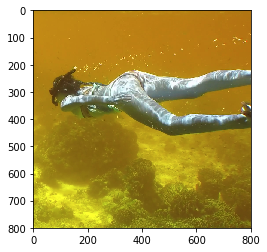

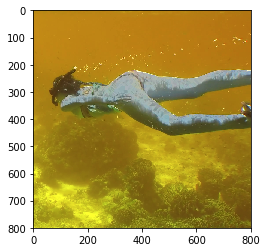

True

In [21]:
#Copying interpolated skin onto the original picture

im_res = np.copy(im_original)

%matplotlib inline
dip.imshow(im_original)
dip.show()

for i in range(np.shape(im_res)[0]):
    for j in range(np.shape(im_res)[1]):
        if (im_skin_interp[i,j] > [0, 0, 0]).all():
            im_res[i,j] = im_skin_interp[i,j]
            
%matplotlib inline
dip.imshow(im_res)
dip.show()

cv2.imwrite("temp_images/result.png", im_res)